# Importing Packages

In [109]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoLocator
from matplotlib.pyplot import hist
from shapely.geometry import Point
import geopandas as gpd
import seaborn as sns 
from geopandas import GeoDataFrame
%matplotlib inline

# 1.1 Cleaning Messy Outcome Labels


## Loading the cases

In [150]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_test = pd.read_csv('../data/cases_2021_test.csv')

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,18.940170,72.834830,08.04.2020,NaN,https://twitter.com/ANI/status/124776368418667...,False,NaN
1,NaN,NaN,Tamil Nadu,India,13.124620,79.918150,19.05.2020,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,False,NaN
2,NaN,NaN,Maharashtra,India,18.940170,72.834830,14.05.2020,NaN,https://t.me/indiacovid/4755,False,NaN
3,23,female,Karnataka,India,12.527350,76.894650,23.05.2020,Returnees for Maharashtra,https://twitter.com/DHFWKA/status/126411013913...,False,NaN
4,NaN,NaN,Punjab,India,31.110475,76.154763,16.05.2020,NaN,https://twitter.com/kbssidhu1961/status/126163...,False,NaN


## Outcome Distribution

In [ ]:
cases_train.groupby('outcome').size()

## Filling Outcome_Group 


In [ ]:
hospitalzed = ['Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition',
'discharge', 'discharged']
nonhospitalized = ['Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition']
deceased = ['Dead', 'Death', 'Deceased', 'Died', 'death', 'died']
recovered = ['Recovered','recovered']


In [ ]:
cases_train.loc[cases_train["outcome"].isin(hospitalzed), "outcome_group"] ='hospitalized'
cases_train.loc[cases_train["outcome"].isin(nonhospitalized), "outcome_group"] ='nonhospitalized'
cases_train.loc[cases_train["outcome"].isin(deceased), "outcome_group"] ='deceased'
cases_train.loc[cases_train["outcome"].isin(recovered), "outcome_group"] ='recovered'
cases_train = cases_train.drop(columns="outcome")
cases_train.head()

# 1.3 Exploratory Data Analysis


## Distribution of the attributes

### CASES 2021 TRAIN

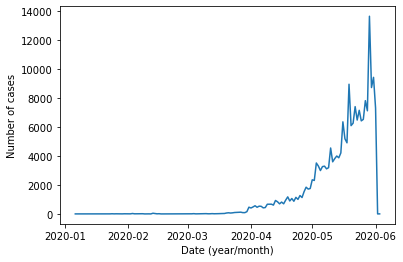

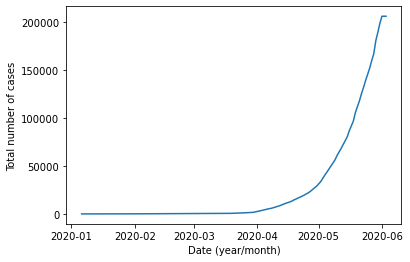

In [119]:
by_day=cases_train['date_confirmation'].value_counts().rename_axis('date').reset_index(name='counts')
by_day['date']=pd.to_datetime(by_day['date'], errors='coerce',infer_datetime_format=True)
by_day['counts']=by_day['counts'].astype(int)
by_day=by_day.sort_values(by='date')
by_day=by_day.dropna(axis=0)
totals=[]
totals.append(by_day['counts'].iloc[0])
for i in range(1,137):
       totals.append(totals[i-1]+by_day['counts'].iloc[i])
by_day['totals']=totals

plt.plot(by_day['date'],by_day['counts'])
plt.xlabel('Date (year/month)')
plt.ylabel('Number of cases')
plt.savefig('../plots/fig1.png')
plt.show()
plt.plot(by_day['date'],by_day['totals'])
plt.xlabel('Date (year/month)')
plt.ylabel('Total number of cases')
plt.savefig('../plots/fig2.png')

In [ ]:
p = sns.countplot(x="outcome_group",data= cases_train)
p.set(xlabel="Outcome Group", ylabel="Cases")
p.set(ylim=(0,150000))

#### Analysing Cases With Hospital Outcome

##### Hospitalized Against Date

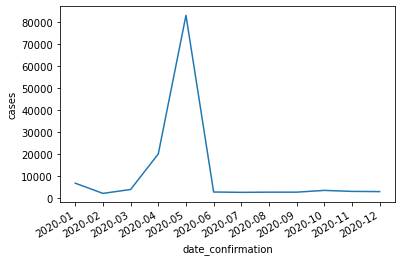

In [118]:
cases_train_hosp = cases_train.loc[cases_train['outcome_group'] =='hospitalized']
cases_train_hosp['date_confirmation'] = cases_train_hosp['date_confirmation'].astype('datetime64[ns]')
cases_train_hosp['date_confirmation'] = cases_train_hosp['date_confirmation'].dt.strftime('%Y-%m')
date = cases_train_hosp.groupby('date_confirmation').size().to_frame('cases')
p = sns.lineplot(x="date_confirmation",y="cases",data = date)
p.get_figure().autofmt_xdate()
#plt.tight_layout()

##### Map Plot of Hospitalized Cases


In [ ]:

geometry = [Point(xy) for xy in zip(cases_train_hosp['longitude'], cases_train_hosp['latitude'])]
gdf = GeoDataFrame(cases_train_hosp, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);



##### Hospitalized Against Longitude

In [ ]:
longitude = cases_train_hosp.groupby('longitude').size().to_frame('cases')
p = sns.lineplot(x="longitude",y="cases",data = longitude)
p.set(xlim=(50,100))
p.set(ylim=(0,30000))


##### Hospitalized Against Latitude

In [ ]:
latitude = cases_train_hosp.groupby('latitude').size().to_frame('cases')
p= sns.lineplot(x="latitude",y="cases",data = latitude)
p.set(xlim=(0,50))
p.set(ylim=(0,30000))

#### Analysing Cases With Recovered Outcome

##### Recovered Against Date

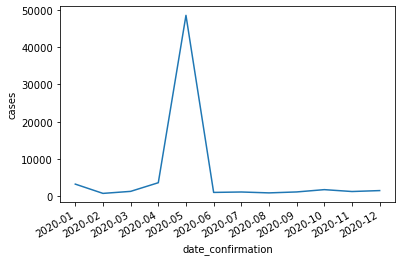

In [120]:

cases_train_recov= cases_train.loc[cases_train['outcome_group'] =='recovered']
cases_train_recov['date_confirmation'] = cases_train_recov['date_confirmation'].astype('datetime64[ns]')
cases_train_recov['date_confirmation'] = cases_train_recov['date_confirmation'].dt.strftime('%Y-%m')
date = cases_train_recov.groupby('date_confirmation').size().to_frame('cases')
p = sns.lineplot(x="date_confirmation",y="cases",data = date)


##### Map Plot of Recovered Cases

In [ ]:

geometry = [Point(xy) for xy in zip(cases_train_recov['longitude'], cases_train_recov['latitude'])]
gdf = GeoDataFrame(cases_train_recov, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

##### Recovered Against Longitude

In [ ]:
longitude = cases_train_recov.groupby('longitude').size().to_frame('cases')
p = sns.lineplot(x="longitude",y="cases",data = longitude)
p.set(xlim=(0,100))
p.set(ylim=(0,15000))


##### Recoverd Against Latitude

In [ ]:
latitude = cases_train_recov.groupby('latitude').size().to_frame('cases')
p= sns.lineplot(x="latitude",y="cases",data = latitude)
p.set(ylim=(0,15000))

#### Analysing Cases With Deceased Outcome

##### Deceased Against Date

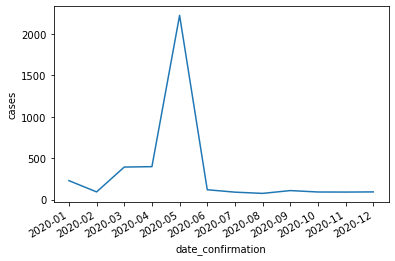

In [143]:
cases_train_dec= cases_train.loc[cases_train['outcome_group'] =='deceased']
cases_train_dec.loc[cases_train_dec['date_confirmation'].str.len() > 10,"date_confirmation"] = "26.02.2020"
cases_train_dec['date_confirmation'] = cases_train_dec['date_confirmation'].astype('datetime64[ns]')
cases_train_dec['date_confirmation'] = cases_train_dec['date_confirmation'].dt.strftime('%Y-%m')
date = cases_train_dec.groupby('date_confirmation').size().to_frame('cases')
p = sns.lineplot(x="date_confirmation",y="cases",data = date)
p.get_figure().autofmt_xdate()

##### Map Plot of Deceased Cases

In [ ]:

geometry = [Point(xy) for xy in zip(cases_train_dec['longitude'], cases_train_dec['latitude'])]
gdf = GeoDataFrame(cases_train_dec, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

##### Deceased Against Longitude

In [ ]:
longitude = cases_train_dec.groupby('longitude').size().to_frame('cases')
p = sns.lineplot(x="longitude",y="cases",data = longitude)
p.set(ylim=(0,1000))


##### Deceased Against Latitude

In [ ]:
latitude = cases_train_dec.groupby('latitude').size().to_frame('cases')
p= sns.lineplot(x="latitude",y="cases",data = latitude)
p.set(ylim=(0,1000))

#### Analysing Cases With Non-Hospitalized Outcome

##### Nonhospitalized Against Date

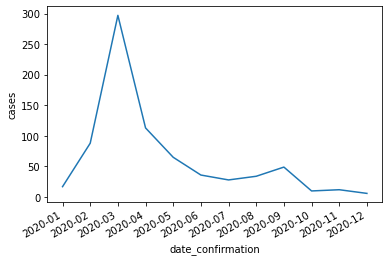

In [144]:
cases_train_nonhosp= cases_train.loc[cases_train['outcome_group'] =='nonhospitalized']
cases_train_nonhosp['date_confirmation'] = cases_train_nonhosp['date_confirmation'].astype('datetime64[ns]')
cases_train_nonhosp['date_confirmation'] = cases_train_nonhosp['date_confirmation'].dt.strftime('%Y-%m')
date = cases_train_nonhosp.groupby('date_confirmation').size().to_frame('cases')
p = sns.lineplot(x="date_confirmation",y="cases",data = date)
p.get_figure().autofmt_xdate()

##### Map Plot of Non Hospitalized Cases

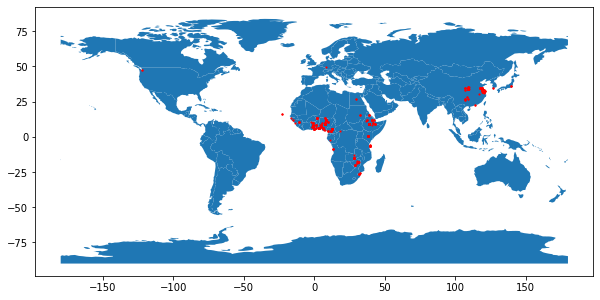

In [97]:

geometry = [Point(xy) for xy in zip(cases_train_nonhosp['longitude'], cases_train_nonhosp['latitude'])]
gdf = GeoDataFrame(cases_train_nonhosp, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

##### NonHospitalized Against Longitude

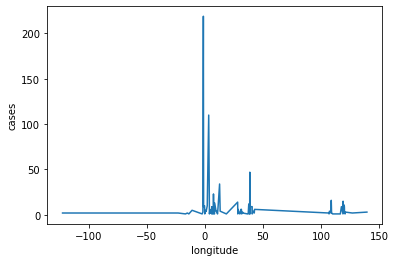

In [99]:
longitude = cases_train_nonhosp.groupby('longitude').size().to_frame('cases')
p = sns.lineplot(x="longitude",y="cases",data = longitude)


##### Non Hospitalized Against Latitude

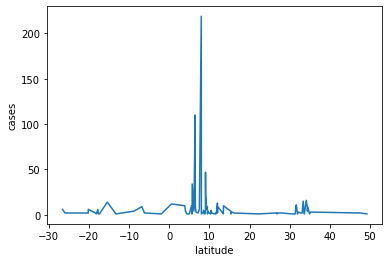

In [101]:
latitude = cases_train_nonhosp.groupby('latitude').size().to_frame('cases')
p= sns.lineplot(x="latitude",y="cases",data = latitude)

#### Plotting All Cases on World Map

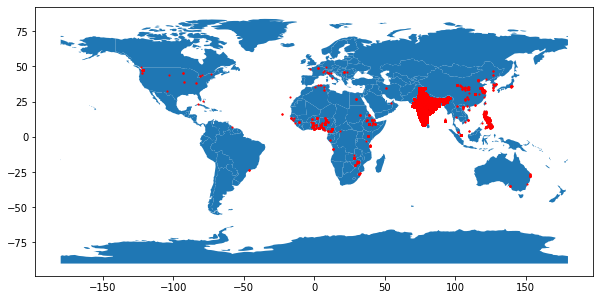

In [102]:
geometry = [Point(xy) for xy in zip(cases_train['longitude'], cases_train['latitude'])]
gdf = GeoDataFrame(cases_train, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

#### Counts of Missing Values

In [125]:
cases_train.isna().sum()

age                       182793
sex                       180362
province                     604
country                        1
latitude                       0
longitude                      0
date_confirmation             51
additional_information    193444
source                     18394
chronic_disease_binary         0
outcome_group                  0
geometry                       0
dtype: int64

### CASES 2021 TEST

In [148]:
print(cases_test.head())
cases_test1=pd.read_csv('../data/cases_2021_test.csv')
cases_test=cases_test1['country'].value_counts().rename_axis('country').reset_index(name='counts')
cases_test['counts']=cases_test['counts'].astype(int)
cases_test=cases_test.drop(labels=0,axis=0)
cases_test=cases_test.drop(labels=1,axis=0)

     country  counts
2      Ghana     131
3      China      83
4    Nigeria      74
5   Ethiopia      42
6  Singapore      40


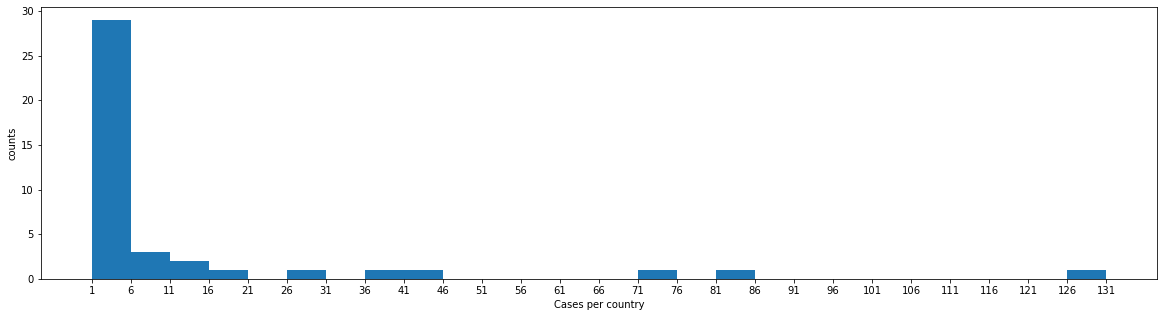

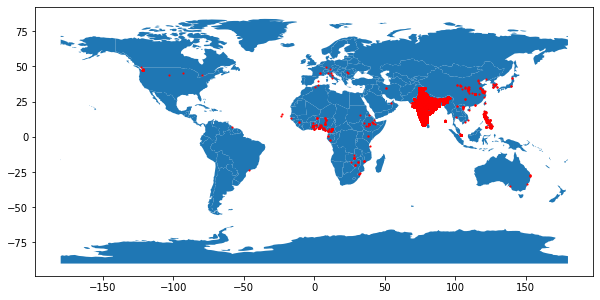

In [146]:
plt.figure(figsize=(20, 5))
plt.hist(cases_test['counts'],bins=26)
plt.xticks(np.linspace(1,131,27))
plt.xlabel('Cases per country')
plt.ylabel('counts')
plt.savefig('../plots/fig3.png')
plt.show()

geometry = [Point(xy) for xy in zip(cases_test1['longitude'], cases_test1['latitude'])]
gdf = GeoDataFrame(cases_test1, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='.', color='red', markersize=5);

### LOCATION 2021

In [153]:
location_data=pd.read_csv('../data/location_2021.csv')
location_data.head()


"location_totals=location_data.groupby('Country_Region').sum()\nlocation_totals['Case_Fatality_Ratio']=100*(location_totals['Deaths'].div(location_totals['Confirmed']))\nlocation_totals=location_totals.reset_index()\ntop10deaths=location_totals.sort_values(by='Deaths',ascending=False).head(10)\ntop10deaths"

In [ ]:
plt.figure(figsize=(15, 15))
plt.bar(top10deaths['Country_Region'],top10deaths['Deaths'])
plt.savefig('../plots/fig4.png')

## Distribution of attributes(Map)

## Number of missing values

In [ ]:
cases_train.isna().sum()